<a href="https://colab.research.google.com/github/LilaR66/Defi-IA-bedbugs/blob/main/notebooks/DefiIA_interpretabilite_modeles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Interprétabilité des modèles
### Bedbugs
#### Lila R., Léa C., Flavie K.

L'objectif est d'expliquer les features les plus influentes dans la prédiction des prix d'hôtels. 

Nous allons utiliser des méthodes agnostiques, c'est à dire utilisant le modèle comme une boîte noire.

In [2]:
#import
import pandas as pd
import pickle

In [ ]:
#0 supprimer si pas d'erreurs
#!pip install pandas-profiling==2.8.0 > /dev/null 2>&1
#!pip install pandas==0.25 > /dev/null 2>&1
#!pip install numpy==1.16.5 > /dev/null 2>&1

In [3]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
from google.colab import drive
import os

# drive conexion:
drive.mount('/content/drive') 

utilities_folder = '/content/drive/My Drive/Defi-IA-bedbugs/utilities'

os.chdir(utilities_folder) # placer dans le dossier utilites

from set_path import *
print(PATH)
print(PATH_CODE)
print(PATH_DATA)
#...etc 

import data_preprocessing as DP

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Defi-IA-bedbugs
/content/drive/My Drive/Defi-IA-bedbugs/utilities
/content/drive/My Drive/Defi-IA-bedbugs/data


## Interprétabilité du modèle sans adversarial validation

Entrainement des modèles et récupération de X_train Y_train, X_test, Y_test.

In [7]:
name_testKaggle = "test_set_cleaned_addedFeatures.csv"
name_requests = 'pricing_requests_clean.csv'
name_featHotels = 'features_hotels.csv'

!python models.py --train 1 --name 3 --adversarial 0 --hotelid 1 --name_save "lxgboost_no_adversarial_dd.sav" --drop_duplicates 1 --save_train_test 1
X_train1 = pd.read_csv(PATH_DATA + '/X_train.csv', index_col = 0)
X_test1 = pd.read_csv(PATH_DATA + '/X_test.csv', index_col = 0)
Y_train1 = pd.read_csv(PATH_DATA + '/Y_train.csv', index_col = 0)
Y_test1 = pd.read_csv(PATH_DATA + '/Y_test.csv', index_col = 0)
'''!python models.py --train 1 --name 3 --adversarial 1 --hotelid 1 --name_save "lxgboost_adversarial_dd.sav" --drop_duplicates 1 --save_train_test 1
X_train2 = pd.read_csv(PATH_DATA + '/X_train.csv', index_col = 0)
X_test2 = pd.read_csv(PATH_DATA + '/X_test.csv', index_col = 0)
Y_train2 = pd.read_csv(PATH_DATA + '/Y_train.csv', index_col = 0)
Y_test2 = pd.read_csv(PATH_DATA + '/Y_test.csv', index_col = 0)'''
!python models.py --train 1 --name 1 --adversarial 0 --hotelid 1 --name_save "rf_no_adversarial_dd.sav" --drop_duplicates 1 --save_train_test 1
X_train3 = pd.read_csv(PATH_DATA + '/X_train.csv', index_col = 0)
X_test3 = pd.read_csv(PATH_DATA + '/X_test.csv', index_col = 0)
Y_train3 = pd.read_csv(PATH_DATA + '/Y_train.csv', index_col = 0)
Y_test3 = pd.read_csv(PATH_DATA + '/Y_test.csv', index_col = 0)
'''!python models.py --train 1 --name 1 --adversarial 1 --hotelid 1 --name_save "rf_adversarial_dd.sav" --drop_duplicates 1 --save_train_test 1
X_train4 = pd.read_csv(PATH_DATA + '/X_train.csv', index_col = 0)
X_test4 = pd.read_csv(PATH_DATA + '/X_test.csv', index_col = 0)
Y_train4 = pd.read_csv(PATH_DATA + '/Y_train.csv', index_col = 0)
Y_test4 = pd.read_csv(PATH_DATA + '/Y_test.csv', index_col = 0)'''
!python models.py --train 1 --name 0 --adversarial 0 --hotelid 1 --name_save "xgb_no_adversarial_dd.sav" --drop_duplicates 1 --save_train_test 1
X_train5 = pd.read_csv(PATH_DATA + '/X_train.csv', index_col = 0)
X_test5 = pd.read_csv(PATH_DATA + '/X_test.csv', index_col = 0)
Y_train5 = pd.read_csv(PATH_DATA + '/Y_train.csv', index_col = 0)
Y_test5 = pd.read_csv(PATH_DATA + '/Y_test.csv', index_col = 0)
'''!python models.py --train 1 --name 0 --adversarial 1 --hotelid 1 --name_save "xgb_adversarial_dd.sav" --drop_duplicates 1 --save_train_test 1
X_train6 = pd.read_csv(PATH_DATA + '/X_train.csv', index_col = 0)
X_test6 = pd.read_csv(PATH_DATA + '/X_test.csv', index_col = 0)
Y_train6 = pd.read_csv(PATH_DATA + '/Y_train.csv', index_col = 0)
Y_test6 = pd.read_csv(PATH_DATA + '/Y_test.csv', index_col = 0)'''
!python models.py --train 1 --name 2 --adversarial 0 --hotelid 1 --name_save "cat_no_adversarial_dd.sav" --drop_duplicates 1 --save_train_test 1
X_train7 = pd.read_csv(PATH_DATA + '/X_train.csv', index_col = 0)
X_test7 = pd.read_csv(PATH_DATA + '/X_test.csv', index_col = 0)
Y_train7 = pd.read_csv(PATH_DATA + '/Y_train.csv', index_col = 0)
Y_test7 = pd.read_csv(PATH_DATA + '/Y_test.csv', index_col = 0)
'''!python models.py --train 1 --name 2 --adversarial 1 --hotelid 1 --name_save "cat_adversarial_dd.sav" --drop_duplicates 1 --save_train_test 1
X_train8 = pd.read_csv(PATH_DATA + '/X_train.csv', index_col = 0)
X_test8 = pd.read_csv(PATH_DATA + '/X_test.csv', index_col = 0)
Y_train8 = pd.read_csv(PATH_DATA + '/Y_train.csv', index_col = 0)
Y_test8 = pd.read_csv(PATH_DATA + '/Y_test.csv', index_col = 0)'''

début de la création des datasets (train, test, validation
0 features_hotels.csv 1 1
création des datasets ok
['city', 'language', 'brand', 'group', 'mobile', 'parking', 'pool', 'children_policy', 'stock', 'date', 'request_nb', 'pib', 'nb_tourists', 'nb_hab_km2', 'price_m2']
[LightGBM] [Warning] num_threads is set with nthread=4, will be overridden by n_jobs=2. Current value: num_threads=2
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
erreur du modèle 107.339589576768
MSE: 135.80
le score en inférence vaut 0.97
début de la création des datasets (train, test, validation
0 features_hotels.csv 1 1
création des datasets ok
['city', 'language', 'brand', 'group', 'mobile', 'parking', 'pool', 'children_policy', 'stock', 'date', 'request_nb', 'pib', 'nb_tourists', 'nb_hab_km2', 'price_m2']
erreur du modèle 289.2715734594852
MSE: 296.13
le score en inférence vaut 0.95
début de la création des datasets (train, test, validation
0 features_ho

'!python models.py --train 1 --name 2 --adversarial 1 --hotelid 1 --name_save "cat_adversarial_dd.sav" --drop_duplicates 1 --save_train_test 1\nX_train8 = pd.read_csv(PATH_DATA + \'/X_train.csv\', index_col = 0)\nX_test8 = pd.read_csv(PATH_DATA + \'/X_test.csv\', index_col = 0)\nY_train8 = pd.read_csv(PATH_DATA + \'/Y_train.csv\', index_col = 0)\nY_test8 = pd.read_csv(PATH_DATA + \'/Y_test.csv\', index_col = 0)'

In [6]:
lxgb_noad_val = pickle.load(open(PATH_MODELS + "/lxgboost_no_adversarial_dd.sav", 'rb'))
#lxgb = pickle.load(open(PATH_MODELS + "/lxgboost_adversarial_dd.sav", 'rb'))
rf_noad_val = pickle.load(open(PATH_MODELS + "/rf_no_adversarial_dd.sav", 'rb'))
#rf = pickle.load(open(PATH_MODELS + "/rf_adversarial_dd.sav", 'rb'))
xgb_noad_val = pickle.load(open(PATH_MODELS + "/xgb_no_adversarial_dd.sav", 'rb'))
#xgb = pickle.load(open(PATH_MODELS + "/xgb_adversarial_dd.sav", 'rb'))
cat_noad_val = pickle.load(open(PATH_MODELS + "/cat_no_adversarial_dd.sav", 'rb'))
#cat = pickle.load(open(PATH_MODELS + "/cat_adversarial_dd.sav", 'rb'))

In [7]:
X_train = pd.read_csv(PATH_DATA + '/X_train.csv', index_col = 0)
X_test = pd.read_csv(PATH_DATA + '/X_test.csv', index_col = 0)
Y_train = pd.read_csv(PATH_DATA + '/Y_train.csv', index_col = 0)
Y_test = pd.read_csv(PATH_DATA + '/Y_test.csv', index_col = 0)

X_train.drop("request_number", axis=1, inplace = True)
X_test.drop("request_number", axis=1, inplace = True)
X_train.drop("hotel_id", axis=1, inplace = True)
X_test.drop("hotel_id", axis=1, inplace = True)

### Features importance

We will begin by looking at the features importance.  
Scikit-learn implements some native methods to compute the feature importance of tree-based methods.  
We will use an external library called [Eli5](https://eli5.readthedocs.io/en/latest/overview.html#features) to compute the feature permutation method, which is model agnostic and can thus be applied to our three models.



In [8]:
# Installation de la librairie Eli5
!pip install eli5 > /dev/null 2>&1

Use the ```PermutationImportance``` to compute the features importance of your models.  (Documentation [here](https://eli5.readthedocs.io/en/latest/blackbox/permutation_importance.html)).  
Plot them for each of your model.  
Are the feature importance of the linear model similar to the coefficients?
Are the features as important for all your models?  
Create a dictionnary containing the top 5 features for each of your model (**key**:model name, **value**: dataframe of features importance)

In [ ]:
"""
rf = make_pipeline(
    StandardScaler(),
    RandomForestRegressor(bootstrap=True, max_depth=10, n_estimators=1000)
)

rf.fit(X_train, y_train)
print(f"Cat boost score: {rf.score(X_test, y_test):.2f}")"""

Cat boost score: 0.99


In [ ]:
lxgb_noad_val.get_params([lxgb_noad_val])

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('lgbmregressor',
   LGBMRegressor(colsample_bytree=0.7, learning_rate=0.5, max_depth=10,
                 n_estimators=2000, n_jobs=2, nthread=4, subsample=0.9))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'lgbmregressor': LGBMRegressor(colsample_bytree=0.7, learning_rate=0.5, max_depth=10,
               n_estimators=2000, n_jobs=2, nthread=4, subsample=0.9),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'lgbmregressor__boosting_type': 'gbdt',
 'lgbmregressor__class_weight': None,
 'lgbmregressor__colsample_bytree': 0.7,
 'lgbmregressor__importance_type': 'split',
 'lgbmregressor__learning_rate': 0.5,
 'lgbmregressor__max_depth': 10,
 'lgbmregressor__min_child_samples': 20,
 'lgbmregressor__min_child_weight': 0.001,
 'lgbmregressor__min_split_gain': 0.0,
 'lgbmregressor__n_estimators': 2000,
 'lgbmregressor__n_jobs': 2,
 'lgbmregressor__num_leave

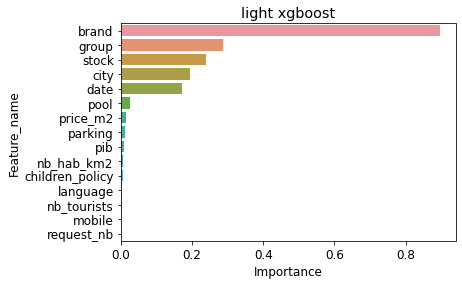

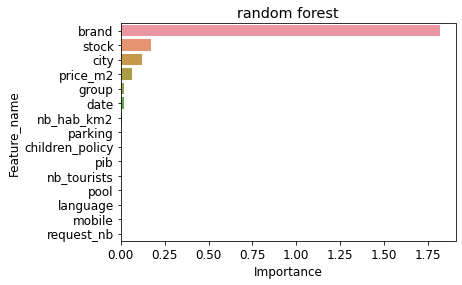

In [9]:
import eli5
from eli5.sklearn import PermutationImportance
import matplotlib.pyplot as plt
import seaborn as sns

feature_names= X_train.columns.tolist()
features_importance_dict = {}
for model, name in zip([lxgb_noad_val, rf_noad_val], ['light xgboost', 'random forest']):
  plt.figure()
  permumtation_impor = PermutationImportance(model, random_state=0).fit(X_test, Y_test)
  features_importance = {'Feature_name':feature_names, 'Importance':permumtation_impor.feature_importances_}  
  features_importance = pd.DataFrame(features_importance) 
  features_importance = features_importance.sort_values(['Importance'], ascending=False) 
  features_importance_dict[name] = features_importance
  ax = sns.barplot(x="Importance", y="Feature_name", data=features_importance)
  plt.title(name)

### PDP and ICE plots

We will use the [pdpbox](https://pdpbox.readthedocs.io/en/latest/) library to generate our PDP and ICE plots.

In [10]:
!pip install pdpbox > /dev/null 2>&1

The following code shows you how to produce a PDP plot for the random forest model.  
```python
from pdpbox import pdp, get_dataset, info_plots

pdp_feat = pdp.pdp_isolate(model=rf, dataset=X_test, model_features=feature_names, feature='MedInc')

pdp.pdp_plot(pdp_feat, 'MedInc', plot_lines=True, frac_to_plot=0.5)
plt.show()
```
Use it to generate the PDP plots for the three most important features of each of your models.  
What is the nature of their relationship with the target?


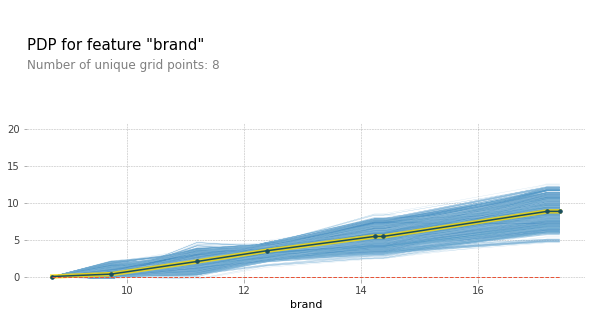

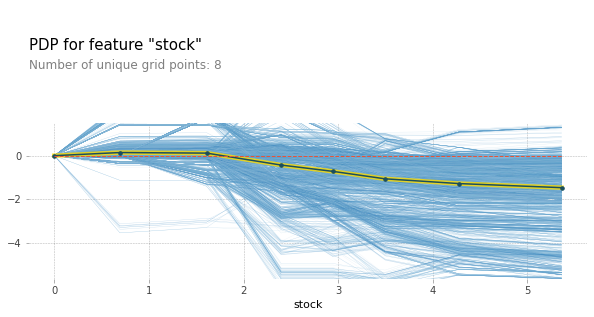

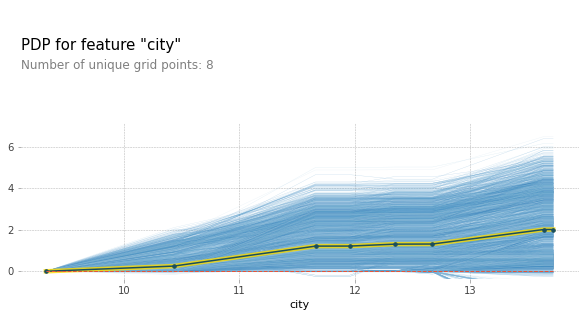

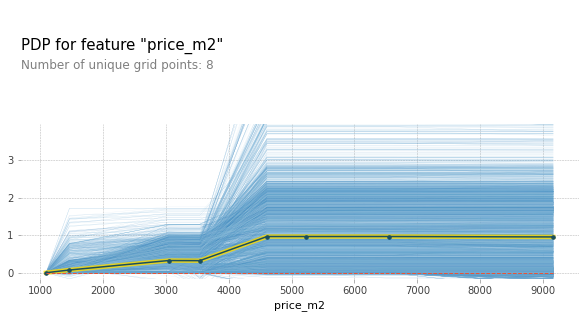

In [11]:
from pdpbox import pdp, get_dataset, info_plots
model = lxgb_noad_val #lr, mlp
model_name = 'light Xgboost'#'logistic regression' , 'multi layer perceptron'

top_4_features = features_importance_dict[model_name].Feature_name[:4].values
for i, feature in enumerate(top_4_features, 1):
  pdp_feat = pdp.pdp_isolate(model=model, dataset=X_test, model_features=feature_names, feature=feature)
  pdp.pdp_plot(pdp_feat, feature, plot_lines=True, frac_to_plot=0.1, figsize=(10,5))
  plt.show()

In [ ]:
features_to_plot = ['stock', 'date']
inter1 = pdp.pdp_interact(model=model, dataset=X_test, model_features=feature_names, features=features_to_plot)

pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type='contour')
plt.show()

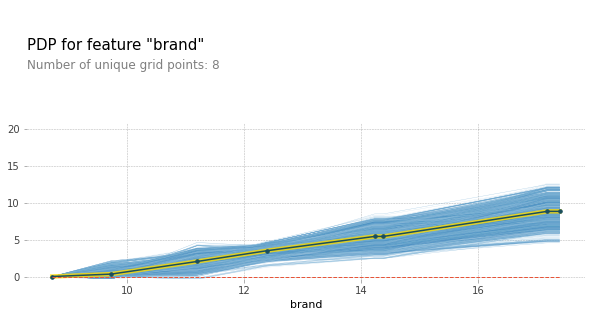

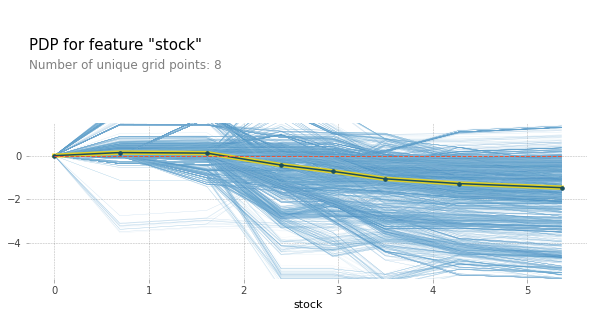

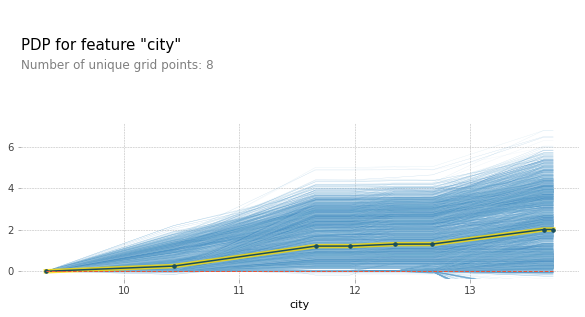

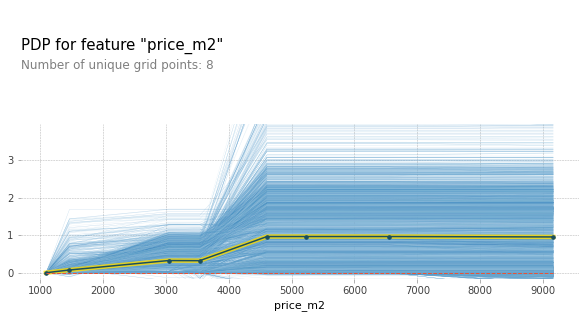

In [12]:
from pdpbox import pdp, get_dataset, info_plots
model = rf_noad_val #lr, mlp
model_name = 'random forest'#'logistic regression' , 'multi layer perceptron'

top_5_features = features_importance_dict[model_name].Feature_name[:5].values
for i, feature in enumerate(top_4_features, 1):
  pdp_feat = pdp.pdp_isolate(model=model, dataset=X_test, model_features=feature_names, feature=feature)
  pdp.pdp_plot(pdp_feat, feature, plot_lines=True, frac_to_plot=0.1, figsize=(10,5))
  plt.show()

It is also possible to visualize the combined effetc of two features:

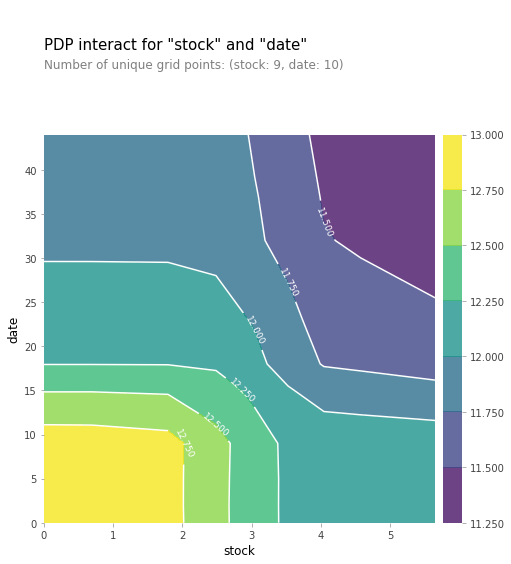

In [ ]:
features_to_plot = ['stock', 'date']
inter1 = pdp.pdp_interact(model=model, dataset=X_test, model_features=feature_names, features=features_to_plot)

pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type='contour')
plt.show()

### SHAP

Previous methods provided global explanations of our models.  
We will now focus on local interpretability methods.  
We will begin with the SHAP methods based on the estimation of the Shapley values.  
The library SHAP implements the SHAP method (and many others).

Inspire yourself with the following [documentation](https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/model_agnostic/Diabetes%20regression.html) to produce a visualization of the estimated Shapley values of your different models, first for a single example using the ```force_plot``` method and for the entire test, dataset using the ```summary_plot``` method.

In [13]:
!pip install shap > /dev/null 2>&1

In [ ]:
import shap
shap.initjs() #needed to plot results directly on the notebook
model = lxgb_noad_val
#idx = 1 # index of the instance we want to explain

explainer = shap.KernelExplainer(model.predict, X_test)
shap_values = explainer.shap_values(X_test.iloc[0,:])
shap.force_plot(explainer.expected_value, shap_values, X_test.iloc[0,:])

In [ ]:
shap_values = explainer.shap_values(X_test.iloc[0:20,:]) #To speed up we just compute the shap values for 100 exemples
shap.summary_plot(shap_values, X_test.iloc[0:20,:])

### Lime  

We also saw in class another model agnostic local interpretability method.    
Many implementations of the LIME method are available in python.  
In this practical session, we will use the [implementation provided by the authors](https://github.com/marcotcr/lime).  

In [ ]:
!pip install lime > /dev/null 2>&1

LIME provides eay to understand an friendly looking explanations for your model predictions.  
You first need to instanciate an Explainer (in our case a ```LimeTabularExplainer```) and then call the ```explain instance``` method of the explainer to get the explanations.  

In [ ]:
import lime
import lime.lime_tabular

index = 0

explainer = lime.lime_tabular.LimeTabularExplainer(X_test.values, feature_names=feature_names, mode="regression")
exp = explainer.explain_instance(X_test.iloc[index], model.predict, num_features=5, top_labels=1)
exp.show_in_notebook(show_table=True, show_all=True)